In [1]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import denormalize, bounding_box

In [2]:
def denormalize(T, coords):
    return 0.5 * ((coords + 1.0) * T)

In [15]:
def plot(plot_dir, epoch):
    # read in pickle files
    glimpses = pickle.load(open(plot_dir + "g_{}.p".format(epoch), "rb"))
    locations = pickle.load(open(plot_dir + "l_{}.p".format(epoch), "rb"))
    
    print("LOCATIONS: ")
    print(locations)
    print(len(locations))
    
    from ipdb import set_trace

    glimpses = np.concatenate(glimpses)
    glimpses = np.expand_dims(glimpses, axis = 0)
    
    print(glimpses.shape)
    
    # grab useful params
    size = int(plot_dir.split("_")[2].split("x")[0])
    
#     size = int(min(H, W) / (6 * 2))
    
    size = int(min(glimpses.shape[2], glimpses.shape[3]) / 5)
    
    num_anims = len(locations)
    num_cols = glimpses.shape[0]
    img_shape = glimpses.shape[2]
    
    # denormalize coordinates
    coords = [denormalize(img_shape, l) for l in locations]
    
    print(coords)
    
    if num_cols == 1:
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        
        plt.imshow(np.transpose(glimpses[0], (1,2,0)), cmap="Greys_r")
#         plt.get_xaxis().set_visible(False)
#         plt.get_yaxis().set_visible(False)   
        
        def updateData(i):
            color = "r"
            co = coords[i]
            print("CO: ", co)
            for p in ax.patches:
                p.remove()
            c = co[0]
            rect = bounding_box(c[0], c[1], size, color)
            ax.add_patch(rect)
        
        # animate
        anim = animation.FuncAnimation(
            fig, updateData, frames = num_anims, interval=500, repeat=True
        )

        # save as mp4
        name = plot_dir + "epoch_{}.mp4".format(epoch)
        anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])        
        
    else:
    
        print(np.array(coords))

        fig, axs = plt.subplots(nrows=1, ncols=num_cols)
        # fig.set_dpi(100)

        # plot base image
        for j, ax in enumerate(axs.flat):
            print(glimpses[j].shape)
            ax.imshow(np.transpose(glimpses[j], (1,2,0)), cmap="Greys_r")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        def updateData(i):
            color = "r"
            co = coords[i]
            for j, ax in enumerate(axs.flat):
                for p in ax.patches:
                    p.remove()
                c = co[j]
                rect = bounding_box(c[0], c[1], size, color)
                ax.add_patch(rect)

        # animate
        anim = animation.FuncAnimation(
            fig, updateData, frames = num_anims, interval = 500, repeat = True
        )

        # save as mp4
        name = plot_dir + "epoch_{}.mp4".format(epoch)
        anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])


LOCATIONS: 
[array([[ 0.9399551 , -0.8673401 ],
       [ 0.04889867, -1.        ]], dtype=float32), array([[ 1.        , -0.84765977],
       [ 0.27273288, -0.6501194 ]], dtype=float32), array([[ 1.        , -0.33502275],
       [ 0.10509396, -0.3753028 ]], dtype=float32), array([[ 0.8756109 , -0.89068913],
       [ 1.        , -0.7777627 ]], dtype=float32)]
4
(1, 3, 3038, 1989)
[array([[2946.7917,  201.5104],
       [1593.2771,    0.    ]], dtype=float32), array([[3038.     ,  231.40482],
       [1933.2812 ,  531.46857]], dtype=float32), array([[3038.     , 1010.10046],
       [1678.6377 ,  948.91504]], dtype=float32), array([[2849.0527 ,  166.0432 ],
       [3038.     ,  337.57843]], dtype=float32)]
CO:  [[2946.7917  201.5104]
 [1593.2771    0.    ]]
CO:  [[2946.7917  201.5104]
 [1593.2771    0.    ]]
CO:  [[3038.       231.40482]
 [1933.2812   531.46857]]
CO:  [[3038.      1010.10046]
 [1678.6377   948.91504]]
CO:  [[2849.0527   166.0432 ]
 [3038.       337.57843]]


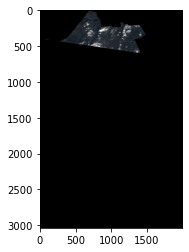

In [16]:
plot("../continuous_v1/plots/ram_4_50x50_0.75/", 2)